# **Data Exploration**

In [3]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Global Health Statistics.csv")

# print(df)

In [5]:
print("Number of samples(rows):", df.shape[0])
print("Number of features(columns):", df.shape[1])


Number of samples(rows): 1000000
Number of features(columns): 22


In [6]:
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [7]:
feature_names = df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['Country' 'Year' 'Disease Name' 'Disease Category' 'Prevalence Rate (%)'
 'Incidence Rate (%)' 'Mortality Rate (%)' 'Age Group' 'Gender'
 'Population Affected' 'Healthcare Access (%)' 'Doctors per 1000'
 'Hospital Beds per 1000' 'Treatment Type' 'Average Treatment Cost (USD)'
 'Availability of Vaccines/Treatment' 'Recovery Rate (%)' 'DALYs'
 'Improvement in 5 Years (%)' 'Per Capita Income (USD)' 'Education Index'
 'Urbanization Rate (%)']


In [8]:
ff_shape = df.shape
print(f'The dataset shape is: {ff_shape}')

The dataset shape is: (1000000, 22)


In [9]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [10]:
disease_counts = df['Disease Name'].value_counts()
display(disease_counts)

Disease Name
COVID-19               50404
Zika                   50313
Dengue                 50289
Cancer                 50285
HIV/AIDS               50274
Cholera                50249
Asthma                 50122
Leprosy                50064
Diabetes               50020
Rabies                 49975
Hepatitis              49970
Polio                  49956
Malaria                49948
Influenza              49919
Tuberculosis           49862
Alzheimer's Disease    49823
Measles                49736
Parkinson's Disease    49708
Ebola                  49692
Hypertension           49391
Name: count, dtype: int64

# **Visualization and Analysis**

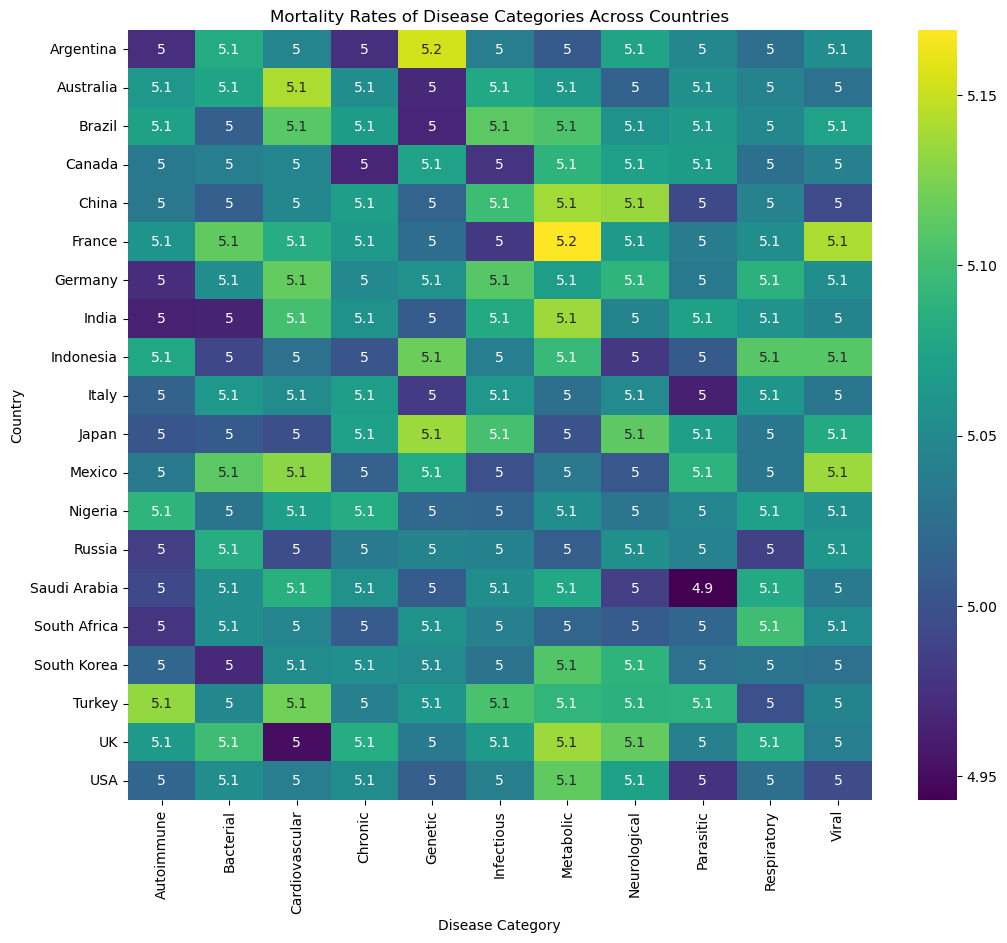

In [12]:
heatmap_val = df.pivot_table(index='Country',values='Mortality Rate (%)', columns='Disease Category')
plt.figure(figsize=(12,10))
sns.heatmap(
    heatmap_val, 
    cmap='viridis', 
    annot=True, 
)
plt.title('Mortality Rates of Disease Categories Across Countries')
plt.show()

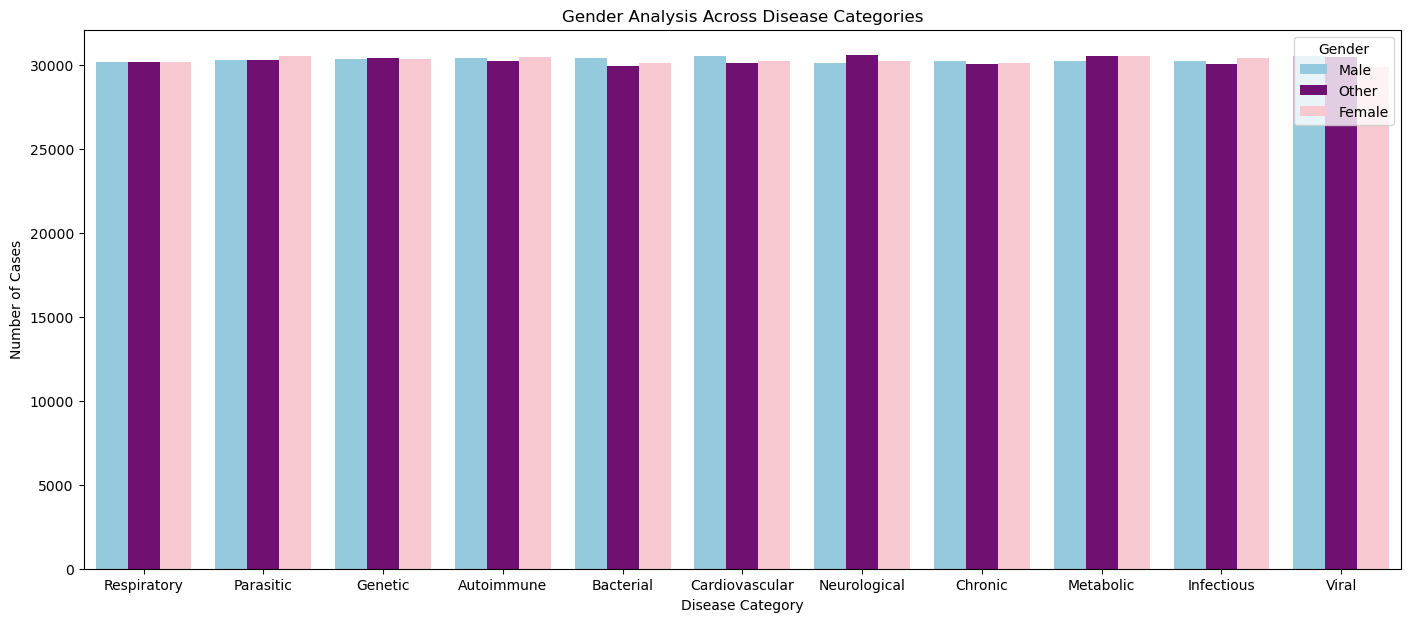

In [13]:
plt.figure(figsize=(17,7))
sns.countplot(data=df, x='Disease Category',hue='Gender',palette={'Female': 'pink', 'Male': 'skyblue', 'Other': 'purple'} )
plt.title('Gender Analysis Across Disease Categories')
plt.xlabel('Disease Category')
plt.ylabel('Number of Cases') 
plt.show()

In [14]:
# gender_counts = df.groupby(['Disease Category', 'Gender']).size().reset_index(name='Count')
# print(gender_counts)
# # print(df.columns)


# **Data Preprocessing**

**Data Splitting**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [18]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst
    

**Putting it all together**

In [20]:
# getting the categorical columns
categorical_columns = ['Country','Disease Name','Disease Category','Gender','Treatment Type','Availability of Vaccines/Treatment']

# Applying one hot encoding to convert the categorial to numerical 
encoded_features = pd.get_dummies(df[categorical_columns])
df = df.drop(columns=categorical_columns)

# Since getting group is in range format we are dropping it for the sake of furthr analysis
if 'Age Group' in df.columns:
    df = df.drop(columns=['Age Group'])

In [21]:
selected_features = ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Healthcare Access (%)','Doctors per 1000', 'Hospital Beds per 1000',
                     'Average Treatment Cost (USD)', 'Per Capita Income (USD)','Education Index', 'Urbanization Rate (%)']

X = df[selected_features]
y = df['Mortality Rate (%)'].values 

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

scaler = StandardScaler()
X_trn_scaled = scaler.fit_transform(X_trn)
X_vld_scaled = scaler.transform(X_vld)
X_tst_scaled = scaler.transform(X_tst)

Random Forest Regressor Performance:
Mean Squared Error(MSE): 8.19878865975473
Root Mean Squared Error(RMSE): 2.8633526956619804


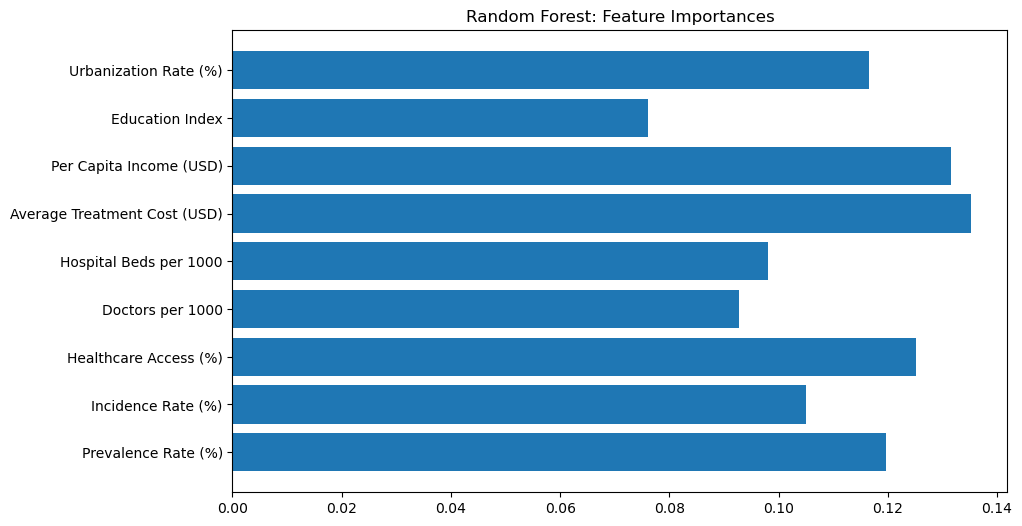

In [22]:
model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)
def train_random_forest(X_trn: np.ndarray, y_trn: np.ndarray, X_tst: np.ndarray, y_tst: np.ndarray):

    model.fit(X_trn,y_trn)
    y_hat = model.predict(X_tst)

    mse_val = mse(y_tst, y_hat)
    rmse_val = np.sqrt(mse_val)
    
    print("Random Forest Regressor Performance:")
    print("Mean Squared Error(MSE):", mse_val)
    print("Root Mean Squared Error(RMSE):", rmse_val)
    
    feature_importances=model.feature_importances_
    
    return model,feature_importances

model, feature_importances = train_random_forest(X_trn_scaled, y_trn, X_tst_scaled, y_tst)    

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)),feature_importances)
plt.yticks(range(len(feature_importances)),selected_features)
plt.title('Random Forest: Feature Importances')
plt.show()

Linear Regression Performance:
Mean Squared Error(MSE): 8.193886954113994
Root Mean Squared Error(RMSE): 2.8624966295375778


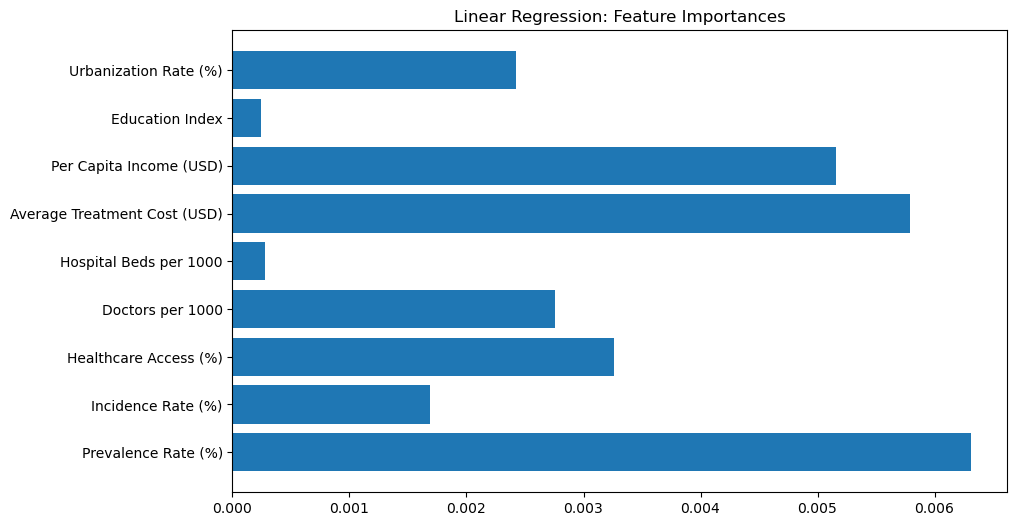

In [23]:
def train_linear_regression(X_trn: np.ndarray, y_trn: np.ndarray, X_tst: np.ndarray, y_tst: np.ndarray):

    model_linear = LinearRegression()
    model_linear.fit(X_trn, y_trn)
    y_hat= model_linear.predict(X_tst)

    mse_val = mse(y_tst, y_hat)
    rmse_val = np.sqrt(mse_val)
    
    print("Linear Regression Performance:")
    print("Mean Squared Error(MSE):",mse_val)
    print("Root Mean Squared Error(RMSE):",rmse_val)

    feature_importances = np.abs(model_linear.coef_)
    return model_linear, feature_importances 


model_linear,feature_importances= train_linear_regression(X_trn_scaled, y_trn, X_tst_scaled, y_tst)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), selected_features)
plt.title('Linear Regression: Feature Importances')
plt.show()

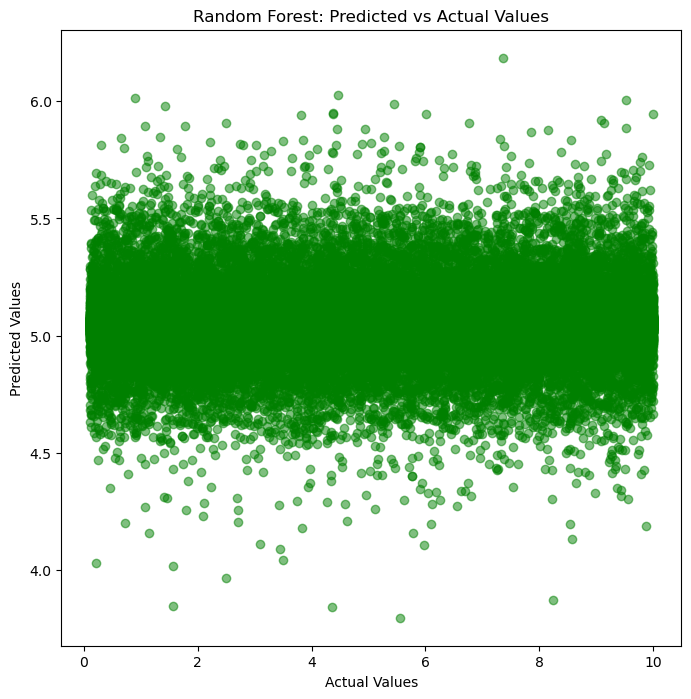

In [24]:
y_hat = model.predict(X_tst_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_tst,y_hat,alpha=0.5,color='green',label='Predicted vs Actual')

plt.title('Random Forest: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

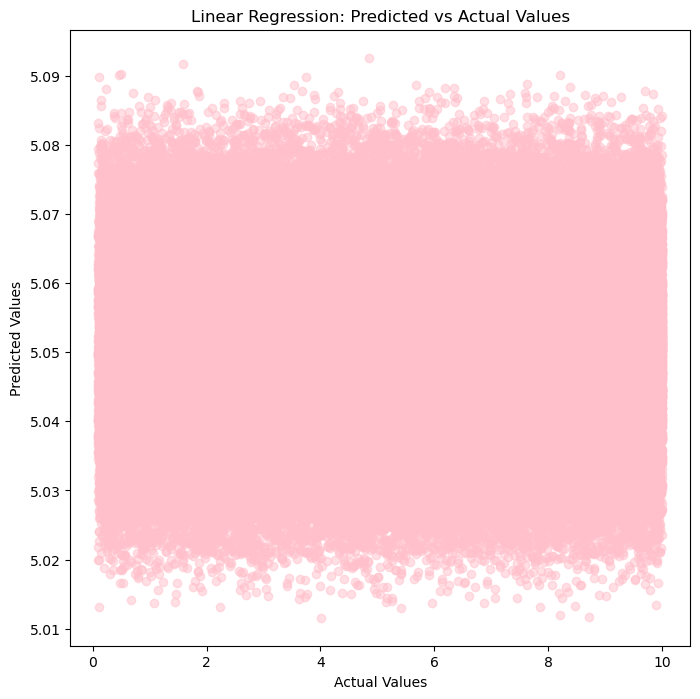

In [25]:
y_hat = model_linear.predict(X_tst_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_tst, y_hat, alpha=0.5, color='pink', label='Predicted vs Actual')

plt.title('Linear Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

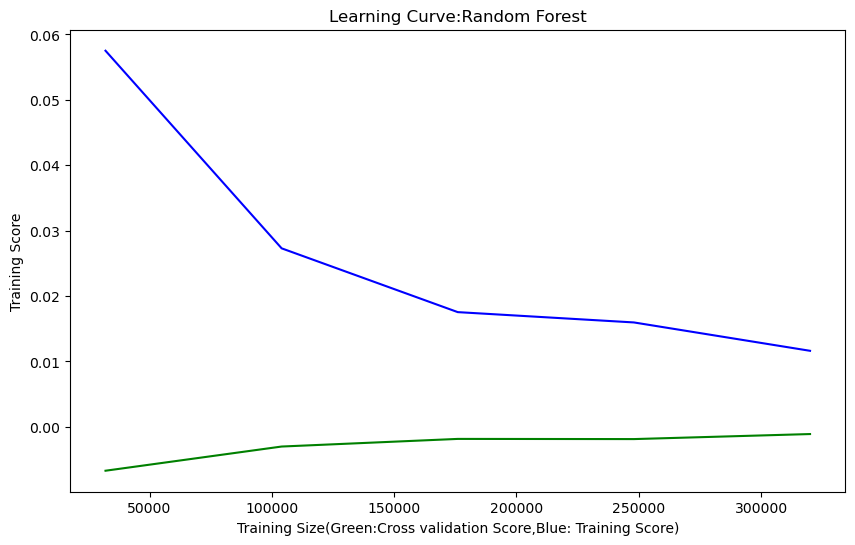

In [26]:
def plot_learning_curve(model, X_trn, y_trn):
    training_sizes, training_scores, test_val = learning_curve(model,X_trn,y_trn,n_jobs=-1,cv=2)

    plt.figure(figsize=(10, 6))
    plt.plot(training_sizes,np.mean(training_scores,axis=1),color="blue")
    plt.plot(training_sizes,np.mean(test_val, axis=1),color="green")
    plt.title(f'Learning Curve:Random Forest')
    plt.xlabel('Training Size(Green:Cross validation Score,Blue: Training Score)')
    plt.ylabel('Training Score')
    plt.show()

plot_learning_curve(model, X_trn_scaled, y_trn)

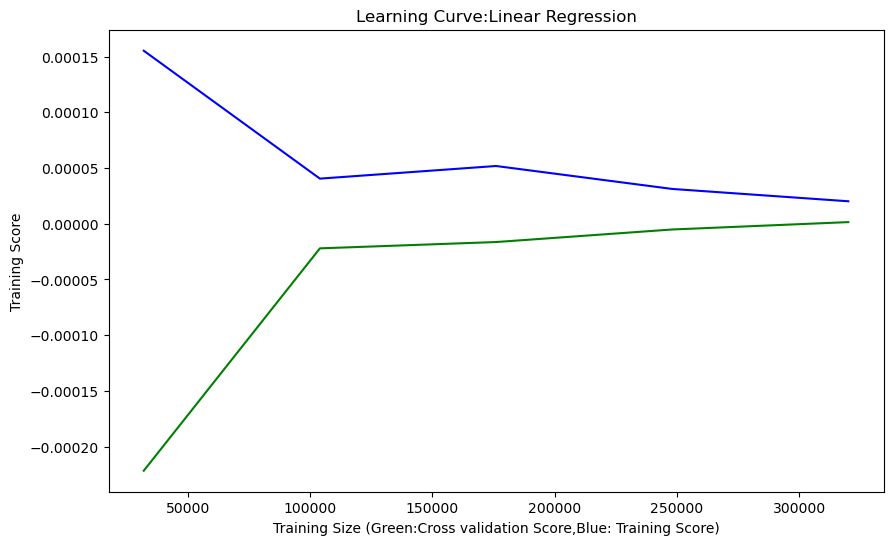

In [27]:
def plot_learning_curve(model, X_trn, y_trn):
    training_sizes, training_scores, test_val= learning_curve(model, X_trn, y_trn,cv=2,n_jobs=-1)

    plt.figure(figsize=(10, 6))
    plt.plot(training_sizes, np.mean(training_scores, axis=1),color="blue")
    plt.plot(training_sizes, np.mean(test_val, axis=1),color="green")
    plt.title(f'Learning Curve:Linear Regression')
    plt.xlabel('Training Size (Green:Cross validation Score,Blue: Training Score)')
    plt.ylabel('Training Score')
    plt.show()

plot_learning_curve(model_linear, X_trn_scaled, y_trn)
